In [214]:
import os
import pandas as pd
import seaborn as sns
from spade_proto.auxiliary import get_data
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("darkgrid")

self = []

In [215]:
# country = 'pl'
# country = 'tjw'
country = 'syr'
# load data from file
big_data = pd.read_csv(f'big_data_{country}.csv',
                             dtype={'EventRootCode': object, 'EventBaseCode': object})
big_data = big_data[['EVENTDESCRIPTION', 'Percentage', 'Relation', 'filtration']]
big_data['event_filtr'] = big_data[['EVENTDESCRIPTION', 'filtration']].agg('_'.join, axis=1)
big_data

,EVENTDESCRIPTION,Percentage,Relation,filtration,event_filtr
0,Make statement- not specified below,3.906168,SYR-RUS,none,Make statement- not specified below_none
1,Make statement- not specified below,5.095139,SYR-ISR,none,Make statement- not specified below_none
2,Make statement- not specified below,3.911460,SYR-IRQ,none,Make statement- not specified below_none
3,Make statement- not specified below,7.571457,SYR-USA,none,Make statement- not specified below_none
4,Make statement- not specified below,3.899801,SYR-IRN,none,Make statement- not specified below_none
...,...,...,...,...,...
2544,De-escalate military engagement,5.511042,SYR-IRQ,goldstein>=3,De-escalate military engagement_goldstein>=3
2545,De-escalate military engagement,2.978309,SYR-IRN,goldstein>=3,De-escalate military engagement_goldstein>=3
2546,De-escalate military engagement,3.875099,SYR-RUS,goldstein>=3,De-escalate military engagement_goldstein>=3
2547,De-escalate military engagement,5.220739,SYR-TUR,goldstein>=3,De-escalate military engagement_goldstein>=3


In [216]:
#load data from file v2

big_data

,EVENTDESCRIPTION,Percentage,Relation,filtration,event_filtr
0,Make statement- not specified below,3.906168,SYR-RUS,none,Make statement- not specified below_none
1,Make statement- not specified below,5.095139,SYR-ISR,none,Make statement- not specified below_none
2,Make statement- not specified below,3.911460,SYR-IRQ,none,Make statement- not specified below_none
3,Make statement- not specified below,7.571457,SYR-USA,none,Make statement- not specified below_none
4,Make statement- not specified below,3.899801,SYR-IRN,none,Make statement- not specified below_none
...,...,...,...,...,...
2544,De-escalate military engagement,5.511042,SYR-IRQ,goldstein>=3,De-escalate military engagement_goldstein>=3
2545,De-escalate military engagement,2.978309,SYR-IRN,goldstein>=3,De-escalate military engagement_goldstein>=3
2546,De-escalate military engagement,3.875099,SYR-RUS,goldstein>=3,De-escalate military engagement_goldstein>=3
2547,De-escalate military engagement,5.220739,SYR-TUR,goldstein>=3,De-escalate military engagement_goldstein>=3


In [217]:
big_data = big_data[['Relation', 'Percentage', 'event_filtr']]
big_data

,Relation,Percentage,event_filtr
0,SYR-RUS,3.906168,Make statement- not specified below_none
1,SYR-ISR,5.095139,Make statement- not specified below_none
2,SYR-IRQ,3.911460,Make statement- not specified below_none
3,SYR-USA,7.571457,Make statement- not specified below_none
4,SYR-IRN,3.899801,Make statement- not specified below_none
...,...,...,...
2544,SYR-IRQ,5.511042,De-escalate military engagement_goldstein>=3
2545,SYR-IRN,2.978309,De-escalate military engagement_goldstein>=3
2546,SYR-RUS,3.875099,De-escalate military engagement_goldstein>=3
2547,SYR-TUR,5.220739,De-escalate military engagement_goldstein>=3


In [218]:
selected_events = ['Make statement- not specified below_none',
                   'Return release- not specified below_goldstein>=3',
                   'Consult- not specified below_nummen>=5',
                   'Engage in negotiation_nummen>=5',
                   'Use conventional military force- not specified below_nummen>=5',
                   'Praise or endorse_nummen>=10',
                   # 'Accuse- not specified below_avgtone>=10or<=-10'
                   ]
big_data_selected = big_data[big_data['event_filtr'].isin(selected_events)]
big_data_selected

,Relation,Percentage,event_filtr
0,SYR-RUS,3.906168,Make statement- not specified below_none
1,SYR-ISR,5.095139,Make statement- not specified below_none
2,SYR-IRQ,3.911460,Make statement- not specified below_none
3,SYR-USA,7.571457,Make statement- not specified below_none
4,SYR-IRN,3.899801,Make statement- not specified below_none
5,SYR-TUR,3.850727,Make statement- not specified below_none
967,SYR-IRQ,5.321841,Consult- not specified below_nummen>=5
968,SYR-RUS,9.134212,Consult- not specified below_nummen>=5
969,SYR-IRN,10.385390,Consult- not specified below_nummen>=5
970,SYR-USA,7.608249,Consult- not specified below_nummen>=5


In [219]:
big_data_selected = big_data_selected.pivot_table(values='Percentage', index='Relation', columns=['event_filtr'])
big_data_selected

event_filtr,Consult- not specified below_nummen>=5,Engage in negotiation_nummen>=5,Make statement- not specified below_none,Praise or endorse_nummen>=10,Return release- not specified below_goldstein>=3,Use conventional military force- not specified below_nummen>=5
Relation,,,,,,
SYR-IRN,10.385390,5.491014,3.899801,6.676264,1.672324,16.620989
SYR-IRQ,5.321841,2.964095,3.911460,3.613205,3.540967,16.890080
SYR-ISR,3.204351,1.941460,5.095139,2.396166,3.966607,16.194092
SYR-RUS,9.134212,5.973786,3.906168,5.493756,1.947719,11.136704
SYR-TUR,5.784781,3.012319,3.850727,4.144521,2.626839,10.891438
SYR-USA,7.608249,3.611715,7.571457,4.580892,2.312952,9.322308


In [220]:
# UWAGA zastępuję NaN zerami!!! co nie koniecznie jest pożądane
big_data_selected = big_data_selected.fillna(0)
big_data_selected

event_filtr,Consult- not specified below_nummen>=5,Engage in negotiation_nummen>=5,Make statement- not specified below_none,Praise or endorse_nummen>=10,Return release- not specified below_goldstein>=3,Use conventional military force- not specified below_nummen>=5
Relation,,,,,,
SYR-IRN,10.385390,5.491014,3.899801,6.676264,1.672324,16.620989
SYR-IRQ,5.321841,2.964095,3.911460,3.613205,3.540967,16.890080
SYR-ISR,3.204351,1.941460,5.095139,2.396166,3.966607,16.194092
SYR-RUS,9.134212,5.973786,3.906168,5.493756,1.947719,11.136704
SYR-TUR,5.784781,3.012319,3.850727,4.144521,2.626839,10.891438
SYR-USA,7.608249,3.611715,7.571457,4.580892,2.312952,9.322308


In [221]:
points = big_data_selected.to_numpy()
points

array([[10.38538963,  5.49101404,  3.89980054,  6.67626417,  1.67232387,
        16.62098906],
       [ 5.3218411 ,  2.96409511,  3.91145952,  3.61320509,  3.54096666,
        16.89008043],
       [ 3.20435146,  1.94146   ,  5.0951387 ,  2.39616613,  3.96660692,
        16.19409215],
       [ 9.13421236,  5.97378585,  3.9061675 ,  5.4937559 ,  1.94771948,
        11.13670372],
       [ 5.78478144,  3.01231912,  3.85072721,  4.14452139,  2.62683863,
        10.89143835],
       [ 7.60824863,  3.61171494,  7.57145749,  4.58089219,  2.31295201,
         9.32230774]])

In [222]:
n_clust = [2, 3, 4, 5
    # , 6, 7, 8
           ]
cl_names = []
cl_results = []

## Find clusters using [kMeans()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [223]:
#klasa KMeans z sklearn, konstruktor przyjmuje liczbę klastrów i sposób inicjalizacji centroidów, random_state=1 za
#każdym razem te same punkty startowe
big_data_result = big_data_selected.copy()

for n_cl in n_clust:
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=n_cl, init='random', random_state=1)
    km = kmeans.fit(points)

    #funkcja predict zwaraca etykiety klastru do jakiego został przypisany obiekt
    clusters_id = kmeans.predict(points)

    cl_name = f'n = {n_cl}'
    cl_names.append(cl_name)
    cl_names = list(dict.fromkeys(cl_names))
    big_data_result[cl_name]=clusters_id

In [224]:
big_data_result = big_data_result[cl_names]
big_data_result.columns.rename('kMeans', inplace=True)
# big_data_result

In [225]:
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
big_data_styler = big_data_result.style.background_gradient(cmap='viridis')

def df_to_png(df, file):
    import imgkit
    imgkit.from_string(df.render(), file,
                       options={
            'format': 'png',
            'quality' : '1',
            'width' : '500',
            'quiet' : ''
                       })

df_to_png(big_data_styler, f'cluster_{country}_kmeans_unscaled.png')
big_data_styler

kMeans,n = 2,n = 3,n = 4,n = 5
Relation,,,,
SYR-IRN,0,0,0,0
SYR-IRQ,1,1,1,4
SYR-ISR,1,1,1,4
SYR-RUS,0,2,2,3
SYR-TUR,0,2,3,2
SYR-USA,0,2,3,1


### Data standardisation with [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [226]:
##jeśli dane są w jakiś sposób skorelowane to znaczy, że występuje redundancja danych, te dane nic nowego nie wnoszą
##są niepotrzebne

## if necessary to scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_points = scaler.fit_transform(points)

## Find clusters using [kMeans()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) on standardised data

In [227]:
#klasa KMeans z sklearn, konstruktor przyjmuje liczbę klastrów i sposób inicjalizacji centroidów, random_state=1 za
#każdym razem te same punkty startowe
big_data_result = big_data_selected.copy()
cl_names = []

for n_cl in n_clust:
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=n_cl, init='random', random_state=1)
    km = kmeans.fit(scaled_points)

    #funkcja predict zwaraca etykiety klastru do jakiego został przypisany obiekt
    clusters_id = kmeans.predict(scaled_points)

    cl_name = f'scaled n={n_cl}'
    cl_names.append(cl_name)
    cl_names = list(dict.fromkeys(cl_names))
    big_data_result[cl_name]=clusters_id

In [228]:
big_data_result = big_data_result[cl_names].sort_values(cl_names[2])
big_data_result.columns.rename('kMeans', inplace=True)
cl_results.append(big_data_result.copy())

In [229]:
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
big_data_styler = big_data_result.style.background_gradient(cmap='viridis')

def df_to_png(df, file):
    import imgkit
    imgkit.from_string(df.render(), file,
                       options={
            'format': 'png',
            'quality' : '100',
            'width' : '830',
            'quiet' : '',
                       })

df_to_png(big_data_styler, f'cluster_{country}_kmeans.png')
big_data_styler

kMeans,scaled n=2,scaled n=3,scaled n=4,scaled n=5
Relation,,,,
SYR-IRN,0,1,0,0
SYR-RUS,0,1,0,3
SYR-USA,0,2,1,1
SYR-ISR,1,0,2,4
SYR-IRQ,1,0,3,4
SYR-TUR,1,2,3,2


## [DBSCAN()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

In [230]:
big_data_result = big_data_selected.copy()
cl_names = []
#funkcje jądrowe dokonują nieliniowej transformacji punktów do przestrzeni wielowymiarowej
#TRIKI JĄDROWE
#dbscan bierze pod uwagę gęstość punktów między sobą,
#znajduje pewne punkty rdzeniowe (żeby punkt był rdzeniowy musi być w koł niego odpowiednia liczba punktów)
#wszystkie punkty w okolicach jednego rdzenia i jego punkty brzegowe tworzą jeden klaster
#wyznaczamy odległości punktów względem siebie, a nie danego klastara
epss = [1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6]
for eps in epss:
    from sklearn.cluster import DBSCAN
    db = DBSCAN(eps=eps, min_samples=1).fit(scaled_points)

    cl_name = f'scaled eps={eps}'
    cl_names.append(cl_name)
    big_data_result[cl_name]=db.labels_


big_data_result = big_data_result[cl_names].sort_values(cl_names[6])
big_data_result.columns.rename('DBSCAN', inplace=True)
cl_results.append(big_data_result.copy())

In [231]:
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
big_data_styler = big_data_result.style.background_gradient(cmap='viridis')

def df_to_png(df, file):
    import imgkit
    imgkit.from_string(df.render(), file,
                       options={
            'format': 'png',
            'quality' : '100',
            'width' : '830',
            'quiet' : '',
                       })

df_to_png(big_data_styler, f'cluster_{country}_db.png')
big_data_styler

DBSCAN,scaled eps=1.6,scaled eps=1.7,scaled eps=1.8,scaled eps=1.9,scaled eps=2.0,scaled eps=2.1,scaled eps=2.2,scaled eps=2.3,scaled eps=2.4,scaled eps=2.5,scaled eps=2.6
Relation,,,,,,,,,,,
SYR-IRN,0,0,0,0,0,0,0,0,0,0,0
SYR-RUS,3,3,2,2,2,0,0,0,0,0,0
SYR-IRQ,1,1,1,1,1,1,1,1,1,1,1
SYR-ISR,2,2,1,1,1,1,1,1,1,1,1
SYR-TUR,4,4,3,3,3,2,2,1,1,1,1
SYR-USA,5,5,4,4,4,3,3,2,2,2,2


## [Spectral Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html)

In [232]:
big_data_result = big_data_selected.copy()
cl_names = []
#klasteryzacja spektralna
#często stosowana w sieciach społecznościowych
n_clust = [2, 3, 4, 5
    # ,6 , 7, 8
           ]

for n_cl in n_clust:
    from sklearn.cluster import SpectralClustering
    model = SpectralClustering(n_clusters=n_cl, affinity='rbf',
                               assign_labels='kmeans')

    cl_name = f'scaled n={n_cl}'
    cl_names.append(cl_name)
    big_data_result[cl_name]=model.fit_predict(scaled_points)


big_data_result = big_data_result[cl_names].sort_values(cl_names[1])
big_data_result.columns.rename('Spectral', inplace=True)
cl_results.append(big_data_result.copy())

/home/micha/anaconda3/envs/geo_env/lib/python3.7/site-packages/sklearn/cluster/_spectral.py:484: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/home/micha/anaconda3/envs/geo_env/lib/python3.7/site-packages/sklearn/cluster/_spectral.py:484: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/home/micha/anaconda3/envs/geo_env/lib/python3.7/site-packages/sklearn/cluster/_spectral.py:484: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/

In [233]:
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
big_data_styler = big_data_result.style.background_gradient(cmap='viridis')

def df_to_png(df, file):
    import imgkit
    imgkit.from_string(df.render(), file,
                       options={
            'format': 'png',
            'quality' : '100',
            'width' : '830',
            'quiet' : '',
                       })

df_to_png(big_data_styler, f'cluster_{country}_spe.png')
big_data_styler

Spectral,scaled n=2,scaled n=3,scaled n=4,scaled n=5
Relation,,,,
SYR-TUR,0,0,2,2
SYR-USA,0,1,1,1
SYR-IRN,1,2,3,0
SYR-IRQ,0,2,0,3
SYR-ISR,0,2,0,3
SYR-RUS,1,2,3,4


## [AgglomerativeClustering()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering)

In [234]:
big_data_result = big_data_selected.copy()
cl_names = []
#powyżej - dendrogram - pokazuje proces łaczenia punktów w klastry
#znajduje dwa najbliższe sobie punkty i kolejne dwa sobie najbliższe i zamyka je w klastrach
#następnie zamyka w klastrach najbliższe sobie małe klastry
# i tak dalej aż zostanie tylke klastrów ile chcemy (kiedy zostanie przekroczony punkt podobieństwa)
#pytanie jak określić podobieństwo klastrów do siebie?
# możemy użyć metody pojedyńczego łaczenia
distances = [1.4, 1.6, 1.7, 1.8, 3, 4]

for dist in distances:
    from sklearn.cluster import AgglomerativeClustering
    agglomerative = AgglomerativeClustering(distance_threshold=dist, n_clusters=None)\
        .fit(scaled_points)
    agglomerative.labels_

    cl_name = f'scaled - distance={dist}'
    cl_names.append(cl_name)
    big_data_result[cl_name]=agglomerative.labels_


big_data_result = big_data_result[cl_names]
big_data_result.columns.rename('agglomerative', inplace=True)
cl_results.append(big_data_result.copy())

import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
big_data_styler = big_data_result.style.background_gradient(cmap='viridis')

def df_to_png(df, file):
    import imgkit
    imgkit.from_string(df.render(), file,
                       options={
            'format': 'png',
            'quality' : '100',
            'width' : '830',
            'quiet' : '',
                       })

df_to_png(big_data_styler, f'cluster_{country}_agg.png')
big_data_styler

agglomerative,scaled - distance=1.4,scaled - distance=1.6,scaled - distance=1.7,scaled - distance=1.8,scaled - distance=3,scaled - distance=4
Relation,,,,,,
SYR-IRN,4,4,4,4,1,1
SYR-IRQ,5,5,5,0,2,2
SYR-ISR,3,3,3,0,2,2
SYR-RUS,2,2,2,2,1,1
SYR-TUR,1,1,1,3,0,0
SYR-USA,0,0,0,1,0,0


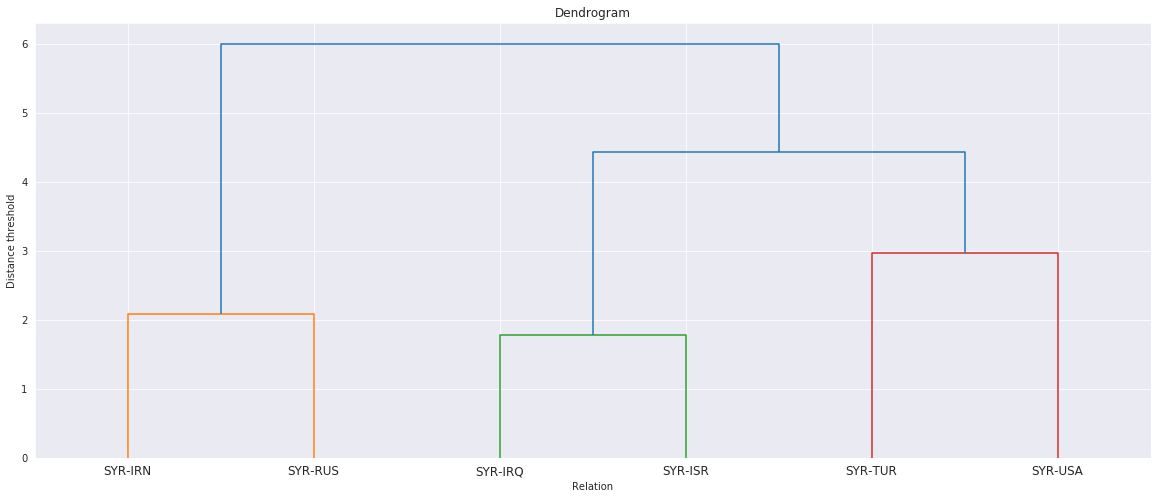

In [235]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


plt.figure(figsize=(20,8))
plot_dendrogram(agglomerative, truncate_mode='level', p=0, labels=big_data_result.index.tolist())
plt.title("Dendrogram")
plt.xlabel("Relation")
# plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance threshold")
plt.savefig(f'cluster_{country}_agg_dendrogram.png', bbox_inches='tight')
plt.show()
plt.close('all')

In [236]:
cl_results

[kMeans    scaled n=2  scaled n=3  scaled n=4  scaled n=5
 Relation                                                
 SYR-IRN            0           1           0           0
 SYR-RUS            0           1           0           3
 SYR-USA            0           2           1           1
 SYR-ISR            1           0           2           4
 SYR-IRQ            1           0           3           4
 SYR-TUR            1           2           3           2,
 DBSCAN    scaled eps=1.6  scaled eps=1.7  scaled eps=1.8  scaled eps=1.9  \
 Relation                                                                   
 SYR-IRN                0               0               0               0   
 SYR-RUS                3               3               2               2   
 SYR-IRQ                1               1               1               1   
 SYR-ISR                2               2               1               1   
 SYR-TUR                4               4               3               3

In [237]:
def test_measure(measure, subset, globalA, cluster_results):
    mea = globalA.columns[measure]
    min = subset.iloc[:, measure].min()
    max = subset.iloc[:, measure].max()
    # print('{}, minimum value: {}, maximum value: {}\n'.format(
    #     mea,
    #     min,
    #     max
    #     ))
    cluster_results = cluster_results.append({'measure name' : mea,
                                              'min' : min,
                                              'max' : max}, ignore_index=True)
    return  cluster_results

def density(globalA):
    for cluster in range(5):
        cluster_results = pd.DataFrame(columns=['measure name', 'min', 'max'])
        # print('Cluster: {}'.format(cluster))
        subset = globalA[globalA.cluster==cluster]
        for measure in range(6):
            cluster_results = test_measure(measure, subset, globalA, cluster_results)

        cluster_results.columns.rename(f'Cluster: {cluster} : {subset.index.values}', inplace=True)
        cluster_results.set_index('measure name', inplace=True)
        print(cluster_results)
        cluster_results_styler = cluster_results.style
        df_to_png(cluster_results_styler, f'cluster{cluster}_measures_{country}.png')


    for measure in range(6):
        for cluster in range(5):
            # Subset to the airline
            # print(cluster)
            # print(globalA)
            # print(globalA[globalA['cluster']==cluster].index.values)
            subset = globalA[globalA.cluster==cluster]
            measure_name = globalA.iloc[:, measure].name

            # Draw the density plot
            data = subset.iloc[:, measure]
            # print(data)
            # print(data.index.values)
            g = sns.distplot(data, hist = False,
                         kde_kws = {'linewidth': 3},
                         label = data.index.values)
        plt.title(f'Density Plot of {measure_name} for clusters - {country}')
        plt.ylabel('Density')
        g.figure.set_size_inches(20,8)
        plt.savefig(f'density_{measure_name}_{country}.png', bbox_inches='tight')

        plt.show()

In [238]:
big_data_selected['cluster'] = cl_results[0]['scaled n=3']
big_data_selected

event_filtr,Consult- not specified below_nummen>=5,Engage in negotiation_nummen>=5,Make statement- not specified below_none,Praise or endorse_nummen>=10,Return release- not specified below_goldstein>=3,Use conventional military force- not specified below_nummen>=5,cluster
Relation,,,,,,,
SYR-IRN,10.385390,5.491014,3.899801,6.676264,1.672324,16.620989,1
SYR-IRQ,5.321841,2.964095,3.911460,3.613205,3.540967,16.890080,0
SYR-ISR,3.204351,1.941460,5.095139,2.396166,3.966607,16.194092,0
SYR-RUS,9.134212,5.973786,3.906168,5.493756,1.947719,11.136704,1
SYR-TUR,5.784781,3.012319,3.850727,4.144521,2.626839,10.891438,2
SYR-USA,7.608249,3.611715,7.571457,4.580892,2.312952,9.322308,2


Cluster: 0 : ['SYR-IRQ' 'SYR-ISR']                        min        max
measure name                                                            
Consult- not specified below_nummen>=5               3.204351   5.321841
Engage in negotiation_nummen>=5                      1.941460   2.964095
Make statement- not specified below_none             3.911460   5.095139
Praise or endorse_nummen>=10                         2.396166   3.613205
Return release- not specified below_goldstein>=3     3.540967   3.966607
Use conventional military force- not specified ...  16.194092  16.890080
Cluster: 1 : ['SYR-IRN' 'SYR-RUS']                        min        max
measure name                                                            
Consult- not specified below_nummen>=5               9.134212  10.385390
Engage in negotiation_nummen>=5                      5.491014   5.973786
Make statement- not specified below_none             3.899801   3.906168
Praise or endorse_nummen>=10                       

/home/micha/anaconda3/envs/geo_env/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/micha/anaconda3/envs/geo_env/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


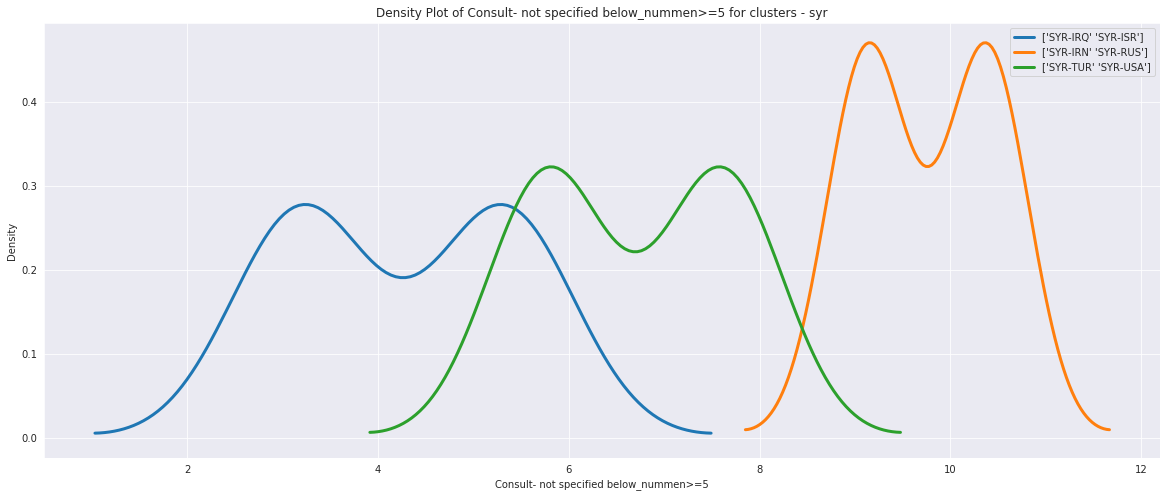

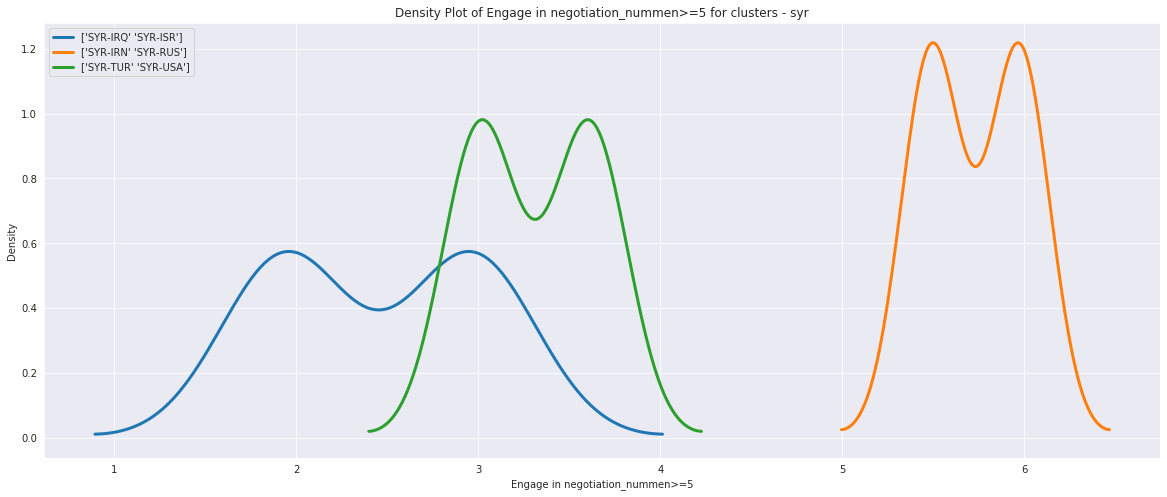

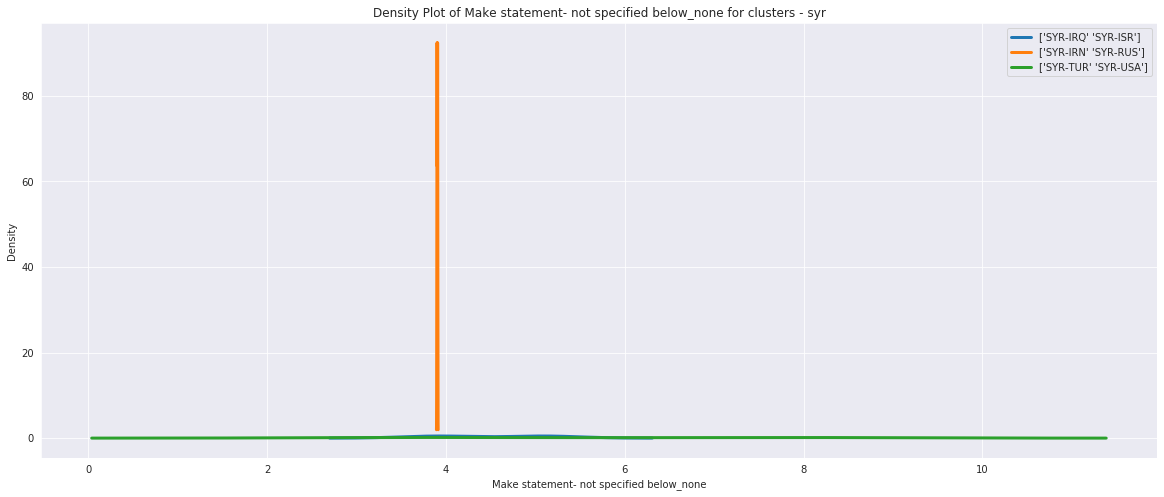

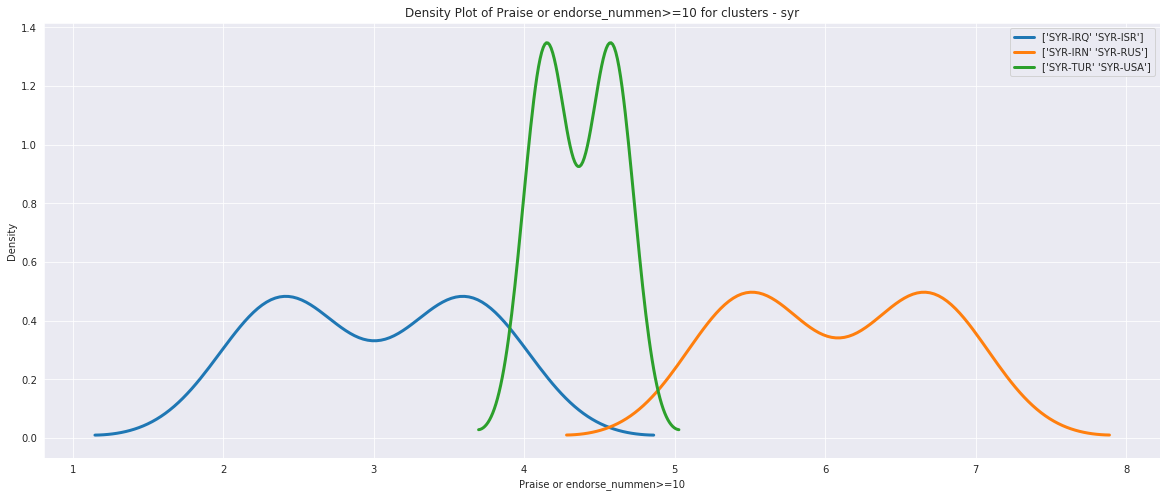

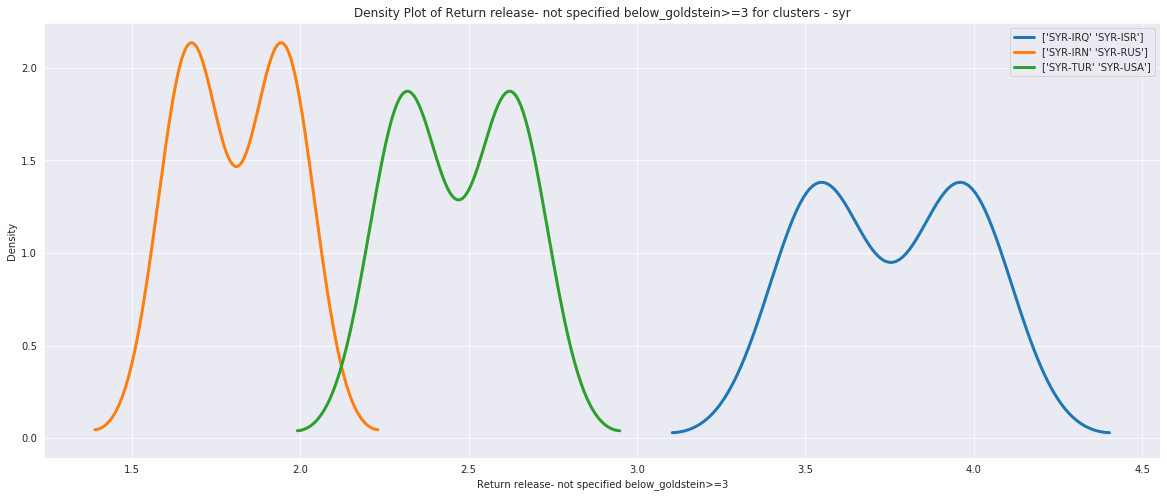

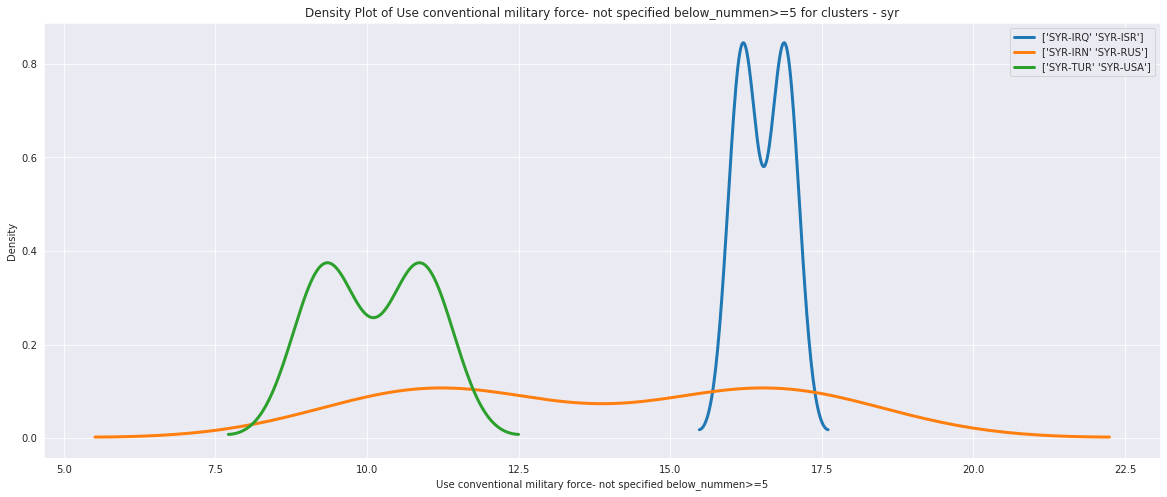

In [239]:
density(big_data_selected)